In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [4]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
raw_dataset = pd.read_csv(url)

In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


First, create a NumPy array made of the `'Horsepower'` features. Then, instantiate the `tf.keras.layers.Normalization` and fit its state to the `horsepower` data:

Build the Keras Sequential model:

In [11]:
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(dataset['Hours'])
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict `'MPG'` from `'Horsepower'`.

Run the untrained model on the first 10 'Horsepower' values. The output won't be good, but notice that it has the expected shape of `(10, 1)`:

In [13]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [21]:
%%time
history = horsepower_model.fit(
    dataset['Hours'],
    dataset['Scores'],
    epochs=500,
    # Suppress logging.
    verbose=0
    # Calculate validation results on 20% of the training data.
   )

CPU times: user 1.68 s, sys: 44.1 ms, total: 1.72 s
Wall time: 2.62 s


In [30]:
horsepower_model.predict(pd.Series([2.0,3.5,10]))

1/1 [==============================] - 0s 21ms/step


array([[24.586],
       [38.373],
       [98.116]], dtype=float32)

1/1 [==============================] - 0s 24ms/step


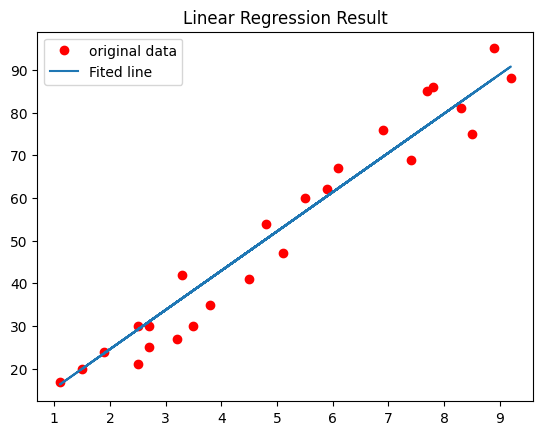

In [31]:
plt.plot(dataset['Hours'], dataset['Scores'], 'ro', label ='original data')
plt.plot(dataset['Hours'], horsepower_model.predict(dataset['Hours']), label ='Fited line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()